In [2]:
import numpy as np
import matplotlib.pyplot as plt

Numpy 的核心优势：运算快。Numpy 用电脑内存中连续的一块物理地址存储数据，找到前后的号不用跑很远，非常迅速。而 Python 的 List 并不是连续存储的，它的数据是分散在不同的物理空间，在批量计算的时候，连号的肯定比不连号的算起来更快。因此只要是处理大规模数据的批量计算，Numpy 肯定会比 Python 的原生 List 要快。

In [8]:
import time

t0 = time.time()
l = list(range(1000))
for _ in range(10000):
    for i in range(len(l)):
        l[i] += 1

t1 = time.time()
a = np.array(l)
for _ in range(10000):
    a += 1

print("Python list spend {:.3f}s".format(t1-t0))
print("Numpy array spend {:.3f}s".format(time.time()-t1))


Python list spend 1.188s
Numpy array spend 0.014s


即使用 map 来代替 Python 的原生循环赋值，Numpy 还是要快一些

In [9]:
import time

t0 = time.time()
l = list(range(1000))
for _ in range(10000):
    l = list(map(lambda i: i+1, l)) # map() 会根据提供的函数对指定序列做映射

t1 = time.time()
a = np.array(l)
for _ in range(10000):
    a += 1

print("Python list with map spend {:.3f}s".format(t1-t0))
print("Numpy array spend {:.3f}s".format(time.time()-t1))

Python list with map spend 0.801s
Numpy array spend 0.014s


## 创建多维数据

In [2]:
array = np.array([[1,2,3], [2,3,4]], dtype=np.int64)
print(array)
print(array.dtype)
print(array.ndim) # 数据维度
print(array.shape) # 行数和列数
print(array.size) # 元素个数

[[1 2 3]
 [2 3 4]]
int64
2
(2, 3)
6


In [4]:
a = np.zeros((3,4), dtype=np.float64) 
b = np.ones((3,4), dtype = np.int)
c = np.empty((3,4)) # 创建起来比 ones, zeros, full 都快一点
d = np.full([2,3], 9) # 全是 9 这个数值

In [28]:
a = np.arange(10,20,2) # 创建连续数组
b = np.arange(12).reshape(3,4) # 改变数据的形状
c = np.linspace(-1, 1, 5) # 创建线段型数据
d = np.linspace(-1, 1, 5, endpoint=False)
print(a)
print(b)
print(c)
print(d)

[10 12 14 16 18]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[-1.  -0.5  0.   0.5  1. ]
[-1.  -0.6 -0.2  0.2  0.6]


## 基本运算

In [12]:
a = np.array([10,20,30,40])
b = np.arange(4)
print(a-b)
print(b**2)
print(np.sin(a))
print(b<3)

[10 19 28 37]
[0 1 4 9]
[-0.54402111  0.91294525 -0.98803162  0.74511316]
[ True  True  True False]


In [6]:
a = np.array([[1,1],[0,1]])
b = np.arange(4).reshape((2,2))
print(a*b)  # 逐元素

a = np.arange(6).reshape((3,2))
b = np.arange(6).reshape((2,3))
print(np.dot(a,b))  # 矩阵相乘

[[0 1]
 [0 3]]
[[ 3  4  5]
 [ 9 14 19]
 [15 24 33]]


In [7]:
a = np.random.random((2,4))
print(a)
print(np.sum(a, axis=1)) # 按行
print(np.max(a, axis=0)) # 按列
print(np.min(a)) # 所有元素求最小

[[0.22124862 0.59132268 0.76676852 0.2883183 ]
 [0.39921904 0.1371137  0.4995897  0.52379057]]
[1.86765812 1.55971301]
[0.39921904 0.59132268 0.76676852 0.52379057]
0.13711370158424896


In [20]:
a = np.arange(2,14).reshape((3,4))
print(a)
print(np.argmax(a)) # 最大元素的索引
print(np.mean(a)) # 均值
print(np.median(a)) # 中位数
print(np.std(a)) # 标准差

print(np.cumsum(a)) # 累加函数
print(np.diff(a)) # 累差函数
print(np.nonzero(a)) # 将所有非零元素的行与列坐标分割开，重构成两个分别关于行和列的矩阵
print(np.count_nonzero(a)) # 非零总数

a = np.arange(14,2,-1).reshape((3,4))
print(np.sort(a)) # 排序函数，针对每一行从小到大排序
print(np.transpose(a)) # 矩阵转置
print(a.T) # 矩阵转置
print(np.clip(a,5,9)) # clip(Array,Array_min,Array_max) 将小于最小值的元素变成最小值，大于最大值的元素变成最大值

[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]
11
7.5
7.5
3.452052529534663
[ 2  5  9 14 20 27 35 44 54 65 77 90]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]), array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]))
12
[[11 12 13 14]
 [ 7  8  9 10]
 [ 3  4  5  6]]
[[14 10  6]
 [13  9  5]
 [12  8  4]
 [11  7  3]]
[[14 10  6]
 [13  9  5]
 [12  8  4]
 [11  7  3]]
[[9 9 9 9]
 [9 9 8 7]
 [6 5 5 5]]


## 索引

In [9]:
a = np.arange(3,15).reshape((3,4))
print(a)
print(a[2,1])
print(a.flatten())
for row in a:
    print(row)
for column in a.T:
    print(column)
for item in a.flat:
    print(item)

[[ 3  4  5  6]
 [ 7  8  9 10]
 [11 12 13 14]]
12
[ 3  4  5  6  7  8  9 10 11 12 13 14]
[3 4 5 6]
[ 7  8  9 10]
[11 12 13 14]
[ 3  7 11]
[ 4  8 12]
[ 5  9 13]
[ 6 10 14]
3
4
5
6
7
8
9
10
11
12
13
14


In [17]:
a = np.arange(12).reshape((3,4))
print(a[a>7]) # 条件筛选

condition = a > 7
print(np.where(condition, -1, a)) # 满足条件的，都改成 -1，不满足的，都还是 a 里面的数字
print(np.where(condition, -1, 2)) # 不满足条件的，也能变成期望的数字
print(np.where(condition, a, -a-1))

[ 8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [-1 -1 -1 -1]]
[[ 2  2  2  2]
 [ 2  2  2  2]
 [-1 -1 -1 -1]]
[[-1 -2 -3 -4]
 [-5 -6 -7 -8]
 [ 8  9 10 11]]


In [26]:
a = np.floor(10*np.random.random((3,4)))
print(a.shape)
b = a.ravel() # 数据变直，ravel() 比 flatten() 快
print(b)
b.reshape(6,2)
print(b)
b.resize(6,2)
print(b)

c = b.reshape(6,-1)
print(c)

(3, 4)
[0. 7. 7. 2. 9. 2. 7. 9. 6. 3. 3. 8.]
[0. 7. 7. 2. 9. 2. 7. 9. 6. 3. 3. 8.]
[[0. 7.]
 [7. 2.]
 [9. 2.]
 [7. 9.]
 [6. 3.]
 [3. 8.]]
[[0. 7.]
 [7. 2.]
 [9. 2.]
 [7. 9.]
 [6. 3.]
 [3. 8.]]


## 合并与分割

In [21]:
a = np.array([1,1,1])
b = np.array([2,2,2])
C = np.vstack((a,b)) # 上下合并
D = np.hstack((a,b)) # 左右合并
print(a.shape)
print(C)
print(C.shape)
print(D)
print(D.shape)

print(a[np.newaxis,:])
print(a[np.newaxis,:].shape)
print(a[:,np.newaxis])
print(a[:,np.newaxis].shape)

(3,)
[[1 1 1]
 [2 2 2]]
(2, 3)
[1 1 1 2 2 2]
(6,)
[[1 1 1]]
(1, 3)
[[1]
 [1]
 [1]]
(3, 1)


In [25]:
A = np.array([1,1,1])[:,np.newaxis]
B = np.array([2,2,2])[:,np.newaxis]
E = np.concatenate((A,B), axis=0) # axis参数很好的控制了矩阵的纵向或是横向打印，相比较vstack和hstack函数显得更加方便
print(E)

a = np.array([1,1,1])
a_expand = np.expand_dims(a, axis=1)
print(a_expand.shape)

a_squeeze = np.squeeze(a_expand) # 只能减少那些维度 shape 上为 1 的维度
a_squeeze_axis = a_expand.squeeze(axis=1)
print(a_squeeze.shape)
print(a_squeeze_axis.shape)

[[1]
 [1]
 [1]
 [2]
 [2]
 [2]]
(3, 1)
(3,)
(3,)


In [13]:
a = np.arange(12).reshape((3,4))
print(a)
print(np.array_split(a,2,axis=1)) # 纵向分割
print(np.array_split(a,3,axis=0)) # 横向分割
print(np.vsplit(a,3))
print(np.hsplit(a,2))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]


## 复制

In [13]:
a = np.arange(4)
b = np.copy(a) # = 的赋值方式会带有关联性，copy() 的赋值方式没有关联性
print(a)
print(b)
a[2] = 7
print(a)
print(b)

[0 1 2 3]
[0 1 2 3]
[0 1 7 3]
[0 1 2 3]


## 随机数

In [29]:
import random
# python 自带的随机数
print(random.random())
print(random.randint(1, 10))

0.3175713832697876
3


In [32]:
dim1, dim2 = 3, 2
print(np.random.rand(dim1, dim2)) # [0, 1) 之间取值的 Array
print(np.random.random([dim1, dim2])) # [0, 1) 之间取值的 Array
print(np.random.randn(dim1, dim2)) # 标准正态分布
print(np.random.randint(low=-3, high=6, size=10)) # 随机整数

[[0.70110563 0.35507417]
 [0.44397218 0.75519398]
 [0.68320987 0.20298969]]
[[0.08578381 0.2270293 ]
 [0.78335887 0.68593821]
 [0.22455635 0.3688279 ]]
[[-0.72705635 -0.89136678]
 [-1.75030179  1.14170445]
 [ 0.51682776  0.0260391 ]]
[ 2 -3  2  3  3  3  2  5  4 -2]


In [33]:
data = np.array([2,1,3,4,6])
print("选一个: ", np.random.choice(data))
print("选多个: ", np.random.choice(data, size=3))
print("不重复地选多个(不放回): ", np.random.choice(data, size=3, replace=False))
print("带权重地选择: ", np.random.choice(data, size=10, p=[0,0,0,0.2,0.8]))

选一个:  4
选多个:  [2 2 1]
不重复地选多个(不放回):  [1 4 2]
带权重地选择:  [6 6 6 4 4 6 6 6 6 6]


In [34]:
data = np.array([2,1,3,4,6])
data_copy = np.copy(data)
np.random.shuffle(data) # 将源数据洗牌重新排列
print("源数据：", data_copy)
print("shuffled:", data)

源数据： [2 1 3 4 6]
shuffled: [1 4 2 3 6]


In [35]:
print("直接出乱序序列：", np.random.permutation(10))
data = np.arange(12).reshape([6,2])
print("多维数据在第一维度上乱序：", np.random.permutation(data))

直接出乱序序列： [0 9 4 2 3 8 6 7 5 1]
多维数据在第一维度上乱序： [[ 2  3]
 [ 4  5]
 [ 0  1]
 [ 8  9]
 [ 6  7]
 [10 11]]


In [36]:
print("正态分布：", np.random.normal(1, 0.2, 10)) # (均值，方差，size)
print("均匀分布：", np.random.uniform(-1, 1, 10)) # (最低，最高，size)

正态分布： [1.10944318 1.43145    1.21437083 0.97620457 0.8948199  1.17133836
 1.12225979 0.9940416  1.08930311 0.98633268]
均匀分布： [-0.92286875 -0.3513939   0.51918539  0.55410492 -0.25374161  0.90865308
  0.32769328  0.00500508  0.83061785 -0.20405231]


In [38]:
np.random.seed(1) # 当我们把种子固定的时候，同一个种子产生的随机序列就会一样，无论运行多少次代码，结果都是同一种结果
print(np.random.randint(2, 10, size=3))
print(np.random.randint(2, 10, size=3))

[7 5 6]
[2 9 3]


## Numpy 加速操作

In [45]:
# 选择 view 的操作
a = np.zeros([100, 100])
a_view1 = a[1:2, 3:6]    # 切片 slice
a_view2 = a[:100]        # 同上
a_view3 = a[::2]         # 跳步
a_view4 = a.ravel()      # 数据展平

# copy 的操作
a = np.zeros([2, 2])
a_copy2 = a[[True, True], [False, True]]  # 用 mask

a = np.zeros([100, 100])
a_copy1 = a[[1,4,6], [2,4,6]]   # 用 index 选
a_copy3 = a[[1,2], :]        # 虽然 1,2 的确连在一起了, 但是他们确实是 copy
a_copy4 = a[a[1,:] != 0, :]  # fancy indexing
a_copy5 = a[np.isnan(a[:,0]), :]  # fancy indexing

In [44]:
a = np.random.rand(1000000, 10)
indices = np.random.randint(0, len(a), size=10000)
a_copy1 = a[indices]
a_copy2 = np.take(a, indices, axis=0) # np.take() 比用 index 选数据要快

In [ ]:
a = np.random.rand(10000, 10)
mask = a[:, 0] < 0.5
a_copy1 = a[mask]
a_copy2 = np.compress(mask, a, axis=0) # np.compress() 比用 mask 选数据要快

## 其他内容

In [14]:
a = np.arange(12)**2
i = np.array([1,1,3,4,5])
print(a[i])
j = np.array([[3,4],[7,9]])
print(a[j])

[ 1  1  9 16 25]
[[ 9 16]
 [49 81]]


In [15]:
a = np.arange(12).reshape(3,4)
i = np.array([[0,1],[1,2]])
j = np.array([[2,1],[3,3]])
print(a[i,j])

[[ 2  5]
 [ 7 11]]


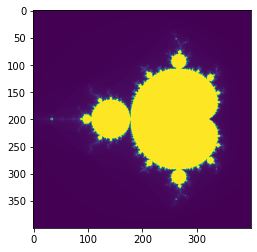

In [16]:
def mandelbrot(h, w, maxit=200):
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=np.int64)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime==maxit)
        divtime[div_now] = i
        z[diverge] = 2
    return divtime
plt.imshow(mandelbrot(400,400))
plt.show() 

In [17]:
a = np.arange(1,5).reshape((2,2))
print(np.linalg.inv(a)) # 逆矩阵
print(np.linalg.eig(a)) # 特征值与特征向量
print(np.trace(a)) # 矩阵的迹

y = np.array([5,7])
print(np.linalg.solve(a,y)) # 求解线性方程组

[[-2.   1. ]
 [ 1.5 -0.5]]
(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))
5
[-3.  4.]


In [46]:
a = np.arange(30)
a.shape = 2,-1,3
print(a.shape)

(2, 5, 3)


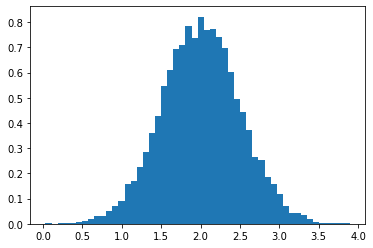

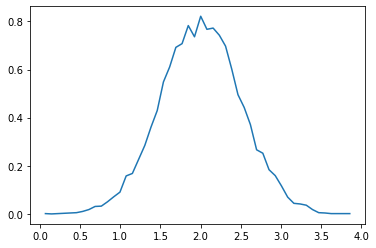

In [19]:
mu, sigma = 2, 0.5
v = np.random.normal(mu, sigma, 10000)
plt.hist(v, bins=50, density=1) # 直方图
plt.show()

(n, bins) = np.histogram(v, bins=50, density=True)
plt.plot(0.5*(bins[1:]+bins[:-1]), n)
plt.show()

## 读取和保存数据

In [ ]:
np.loadtxt(delimiter=",") # Numpy可以读取 csv 和 txt 格式的数据，但是不能读取 xlsx 格式的数据
np.fromstring(sep=",")
np.savetxt(delimiter=",")
np.save() # 保存的是一个以 .npy 结尾的二进制文件
np.load() # 加载上述二进制数据文件
np.savez() # 保存一个 .npz 文件将这两个 array 同时存储，后面的参数作为之后加载回来的索引标签
np.savez_compressed() # 对 np.savez() 做数据压缩

## 加速技巧

In [8]:
# np.partition先对数组升序排序，然后以索引是i的元素为基准，将元素分成两部分，大于该元素的放在其后面，小于该元素的放在其前面，类似于快排
import numpy as np
data = np.array([232, 564, 278, 30, 2, 1, -1, -10, -30, -40])
print(np.partition(data, kth=4))
print(np.partition(data, kth=-4))

[-10 -30 -40  -1   1   2 564  30 278 232]
[  1 -40 -30 -10  -1   2  30 232 278 564]


In [9]:
# np.argpartition()选出最大的5个数的索引，效率比np.argsort()高
a = np.array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])
index_val = np.argpartition(a, -5)[-5:] 
print(index_val)
print(np.sort(a[index_val]))

[2 1 5 8 0]
[4 4 6 9 9]


In [10]:
# allclose() 用于匹配两个数组，并得到布尔值表示的输出。如果在一个公差范围内两个数组不等同，则 allclose() 返回 False。该函数对于检查两个数组是否相似非常有用。
a = np.array([1, 2, 3])
b = np.array([1.001, 2.001, 3.001])
# 一个相对误差值 rtol 和一个绝对误差值 atol
print(np.allclose(a, b, rtol=1e-3, atol=1e-5))

True


In [12]:
# Clip() 使得一个数组中的数值保持在一个区间内。
x = np.array([3, 17, 14, 23, 2, 2, 6, 8, 1, 2, 16, 0])
print(np.clip(x, 2, 10))

[ 3 10 10 10  2  2  6  8  2  2 10  2]


In [13]:
# extract() 在特定条件下从一个数组中提取特定元素
array = np.random.randint(20, size=12)
print(array)
cond = np.mod(array, 2) == 1
print(cond)
a = np.extract(cond, array)
print(a)
b = np.extract(((array < 3) | (array > 15)), array)
print(b)

[ 4 18 10 10 16  1 12 16 15  1 18 10]
[False False False False False  True False False  True  True False False]
[ 1 15  1]
[18 16  1 16  1 18]


In [14]:
# Where() 用于从一个数组中返回满足特定条件的元素。
y = np.array([1,5,6,8,1,7,3,6,9])
print(np.where(y > 5))

(array([2, 3, 5, 7, 8]),)
